In [1]:
import pandas as pd
import tweepy
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

consumer_key = "XXXXXXX"
consumer_secret = "XXXXXXX"
access_token = "XXXXXXX"
access_token_secret = "XXXXXXX"

# Authentication with Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [2]:
def tiene_digitos(texto):
    digitos = ['1','2','3','4','5','6','7','8','9','0']
    r = False
    for digito in digitos:
        res = texto.find(digito)
        if res>-1:
            r = True

    return r

In [3]:
def limpiar_puntos(valor):
    if len(valor.split('.')) > 2:
        num = '.'.join(valor.split('.')[:2])
        return num
    else:
        return valor

In [4]:
def eliminar_alfas(palabra):
    for letra in palabra:
        if letra not in '0123456789.,':
            palabra = palabra.replace(letra,'')

    return palabra

In [5]:
def barrer_tw(tweet_id):

    replies=[]
    for tweet in tweepy.Cursor(api.search,q='to:'+'JohnGalt_is_www', result_type='recent', timeout=999999).items(1000):
        if hasattr(tweet, 'in_reply_to_status_id_str'):
            if (tweet.in_reply_to_status_id_str==tweet_id):
                replies.append(tweet)

    tuits = []
    for tweet in replies:
        texto = tweet.text.replace('\n', ' ')
        texto = texto.replace('@JohnGalt_is_www @Jotatrader_ok ','')
        palabras = texto.split()

        valores = [palabra for palabra in texto.split() if tiene_digitos(palabra)]
        valores = [ (v.replace('$', '').replace(',','.')) for v in valores]
        valores_num = [ float(limpiar_puntos(eliminar_alfas(v))) for v in valores]
        valores_num.sort()
        if len(valores_num)==2:
            if (valores_num[0]>50) & (valores_num[1]>50):
                row = {'user': tweet.user.screen_name, 'GGAL': valores_num[0], 'YPFD':valores_num[1]}
                tuits.append(row)
                
    df = pd.DataFrame(tuits)
    return df

In [6]:
df_1 = barrer_tw('1374051527682326535')
df_2 = barrer_tw('1374051528928034822')

In [7]:
df = pd.concat([df_1,df_2])
df.describe()

,GGAL,YPFD
count,414.000000,414.000000
mean,118.257147,657.357249
std,4.889862,13.176282
min,105.000000,595.000000
25%,116.545000,649.600000
50%,118.105000,657.500000
75%,119.080000,665.500000
max,188.100000,700.420000


array([[<AxesSubplot:title={'center':'GGAL'}>,
        <AxesSubplot:title={'center':'YPFD'}>]], dtype=object)

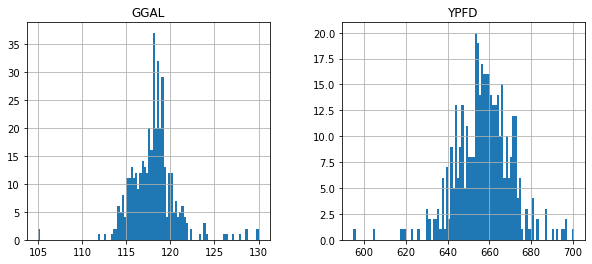

In [8]:
df.GGAL = df.GGAL.clip(90,130)
df.hist(bins=100, figsize=(10,4))

In [10]:
df.to_excel('concurso.xlsx')